----> Importing Important Libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

----> read the data file and covert it to dataframe and then use it as dataframe

In [165]:
df = pd.read_csv("iris.data",names=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"])

----> checking the shape of the dataframe

In [166]:
print(df.shape)

(150, 5)


----> checking information about variables or columns

In [167]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


----> checking descriptive analysis of numerical data 

In [168]:
print(df.describe())

       sepal length in cm  sepal width in cm  petal length in cm  \
count          150.000000         150.000000          150.000000   
mean             5.843333           3.054000            3.758667   
std              0.828066           0.433594            1.764420   
min              4.300000           2.000000            1.000000   
25%              5.100000           2.800000            1.600000   
50%              5.800000           3.000000            4.350000   
75%              6.400000           3.300000            5.100000   
max              7.900000           4.400000            6.900000   

       petal width in cm  
count         150.000000  
mean            1.198667  
std             0.763161  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000  


----> checking descriptive analysis of categorical data

In [169]:
print(df["class"].describe())

count             150
unique              3
top       Iris-setosa
freq               50
Name: class, dtype: object


----> checking null values count and visualize them 

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64


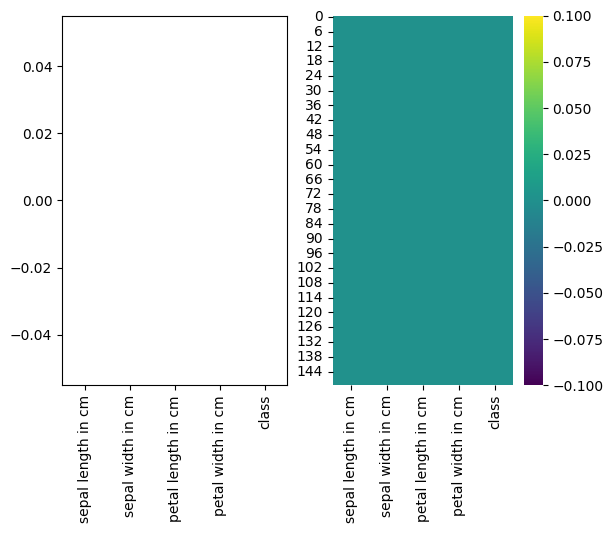

In [170]:
print(df.isnull().sum())
plt.subplots()
plt.subplot(1,2,1)
df.isnull().sum().plot(kind="bar")
plt.subplot(1,2,2)
sns.heatmap(data=df.isnull(),cmap="viridis")
plt.show()

----> conclusion that no null value in dataset 

----> handling target variable i.e class

----> checking count of unique values

In [171]:
print(df["class"].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


----> as values are uniformly distributed so no further checking needed 

----> checking outliers

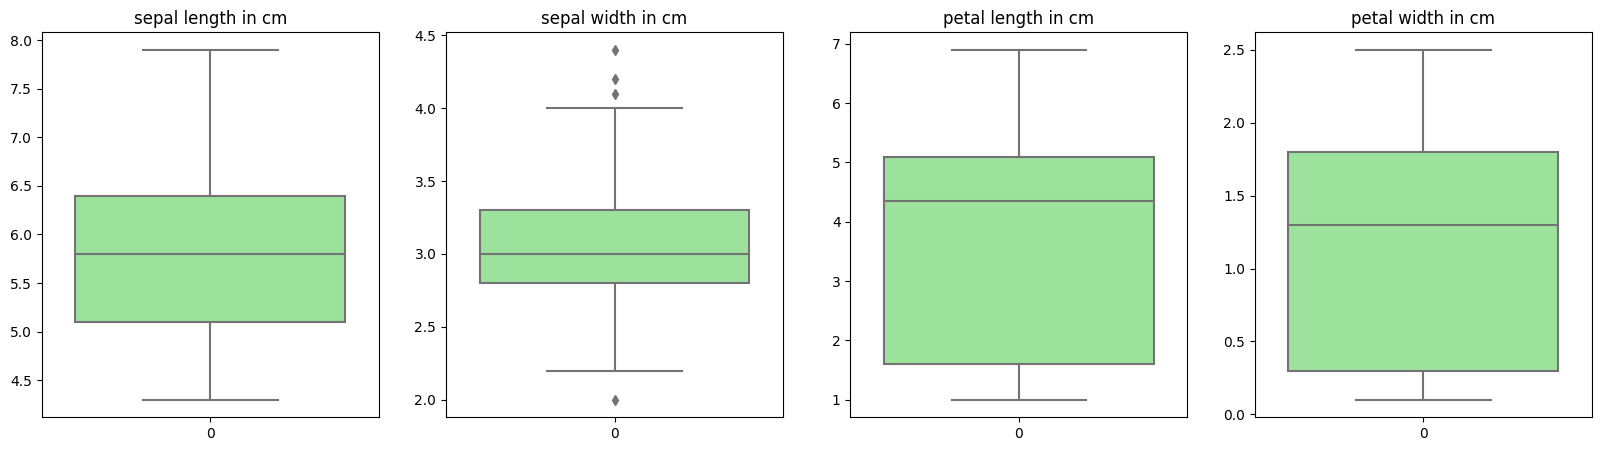

In [172]:
plt.subplots(figsize=(20,5)) 
for i,a in enumerate(df.drop(columns="class").columns):
    plt.subplot(1,4,i+1)
    sns.boxplot(data=df[a],color="lightgreen")
    plt.title(a)
plt.show()

----> treating outliers 

In [173]:
def outlier_treatment(data,how):
    low = data.quantile(.25)-1.5*(data.quantile(.75)-data.quantile(.25))
    up = data.quantile(.75)+1.5*(data.quantile(.75)-data.quantile(.25))
    if how == "mode":
        data[data>up],data[data<low]=data.mode(),data.mode()
    elif how == "mean":
        data[data>up],data[data<low]=data.mean(),data.mean()
    elif how == "lim":
        data[data>up],data[data<low]=up,low
        
    elif how == "median":
        data[data>up],data[data<low]=data.median(),data.median()
    else:
        None
    return data

----> after checking box plot outlier was detected in sepal width in cm columns so treatment for that 

In [174]:
df["sepal width in cm"] = outlier_treatment(data=df["sepal width in cm"],how="lim")

----> after treatment visuaize outlier

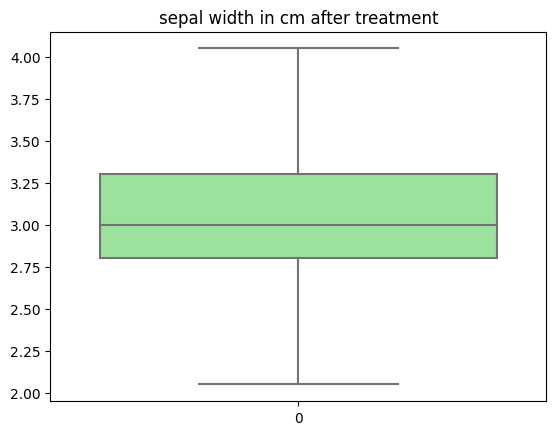

In [175]:
sns.boxplot(df["sepal width in cm"],color="lightgreen")
plt.title("sepal width in cm after treatment")
plt.show()

----> checking relation between target and independent variables 

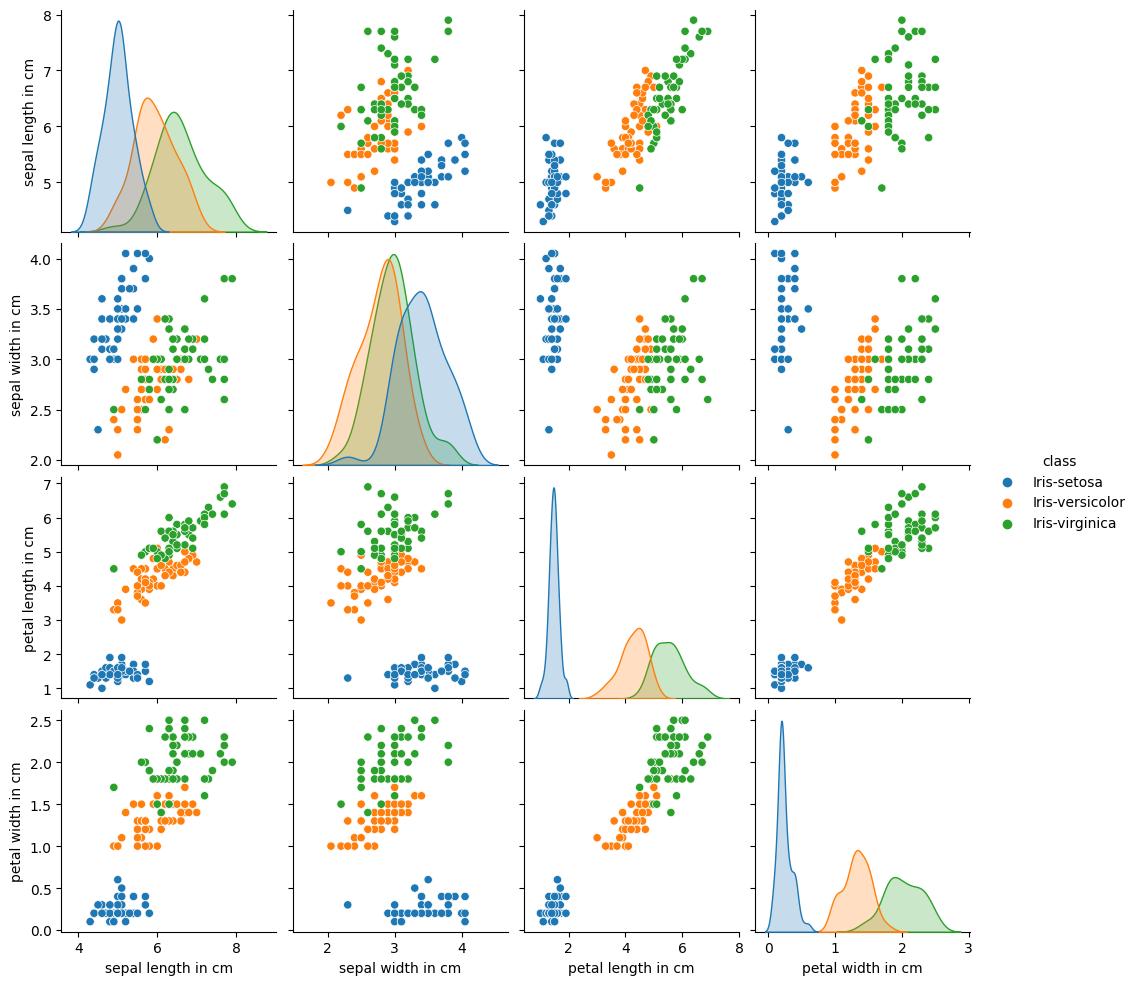

In [176]:
x = df.drop(columns="class")
y = df["class"]
sns.pairplot(data=df,hue="class")
plt.show()

################ uncomment below code to remove multicoleanirity from the dataset    #############################<br>
----> # checking correlations between independent variables<br>
----> sns.heatmap(x.corr(),annot=True,cmap="viridis")<br>
----> plt.show()<br>
----> cor = np.unique([sorted([a,b]) for a in x.columns for b in x.columns if a!=b and abs(df[a].corr(df[b]))>0.5],axis=0)<br>
----> print(cor)

----># function for removing multicolinearity using variance inflation factor method <br>
----> def vif_remover(data):<br>
---->     vif = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)<br>
---->     if vif.max()>5:<br>
---->         data.drop(columns=vif[vif==vif.max()].index[0],inplace=True)<br>
---->         print(f"dropped {vif[vif==vif.max()].index[0]}")<br>
---->         return data<br>
---->     return data

----> # using for loop for removing columns with vif more than 5 iteratively<br>
----> for i in range(4):<br>
---->     x = vif_remover(x)<br>
----> print(x.describe())<br>
####################################################################################################################

----> now splitiing data to test and train 

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


----> feature scalling

----> apply standard scaler

In [178]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

----> creating model for prediction 

In [179]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

----> predicting the test set

In [180]:
y_pred = lr.predict(x_test)

----> checking metrics

----> accuracy score

In [181]:
print(accuracy_score(y_test,y_pred))

1.0


----> confusion matrix

In [182]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


----> display confusion matrix 

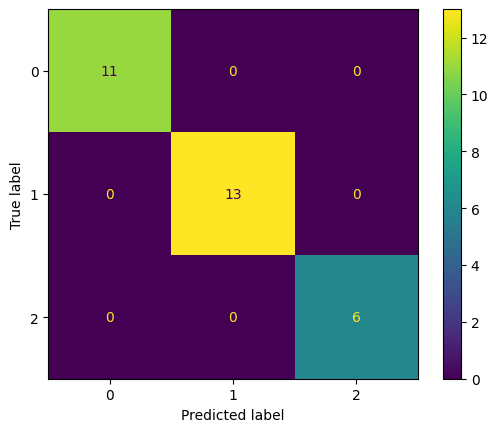

In [183]:
conf_dis = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
conf_dis.plot(cmap="viridis")
plt.show()